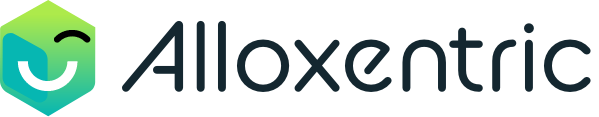

# Fase 1: Business Understanding


### Objetivo del negocio

La situación que voy a abordar afecta principalmente a clientes
morosos. Además, impacta a las áreas de cobranza
dentro de las empresas, que buscan mejorar su eficiencia y reducir
los costos asociados con la gestión de deudas junto con abordar la problemática las dificultades que enfrentan para cumplir con sus obligaciones de pago. Esto con el fin de mejorar la eficiencia y reducir los costos asociados a la gestión de cobranzas.

### Objetivo del proyecto

El objetivo del proyecto es desarrollar una plataforma de optimizador de cobranzas tiene como propósito mejorar la eficiencia en el proceso de cobro de deudas, proporcionando una experiencia de usuario intuitiva que mejore la eficiencia en el proceso de cobro de deudas. La plataforma buscará, además, optimizar la comunicación con los deudores, personalizando las interacciones para mejorar la relación y facilitar acuerdos de pago.

A través del uso de tecnologías avanzadas como machine learning y automatización, la plataforma permitirá segmentar y priorizar deudores, predecir las mejores estrategias de cobro, y asignar automáticamente las acciones más efectivas (como SMS, llamadas, correos, etc.). Esto garantizará una gestión eficiente de las cobranzas y reducirá los costos operativos.



### Requisitos del proyecto


* **Cargado de archivos**: Los usuarios deben poder cargar datos de deudores (principalmente en formato CSV o Excel) para su procesamiento.

* **Registro de deudores**: La plataforma debe permitir la creación, importación y actualización de registros de deudores, incluyendo detalles como nombre, monto de deuda, fechas de vencimiento, historial de pagos, etc.

* **Segmentación de deudores**: Debe ser capaz de agrupar deudores según criterios como historial de pago, antigüedad de la deuda, capacidad de pago, entre otros.

* **Asignación automática de acciones de cobranza**: El sistema debe recomendar y asignar automáticamente acciones específicas basadas en un modelo predictivo.

* **Monitoreo de acciones de cobranza**: La plataforma debe permitir a los gestores de cobranza monitorear el estado de las acciones tomadas y su efectividad.



### KPI



* **Eficiencia de las acciones de cobranza**:

  * Descripción: Mide el porcentaje de acciones de cobranza que resultaron en un pago exitoso.
  * Objetivo: Incrementar este KPI, mostrando que las acciones ejecutadas son efectivas.

* **Tasa de morosidad reducida**:

  * Descripción: Porcentaje de deudores que han salido del estado de morosidad gracias a la intervención de la plataforma.
  * Objetivo: Aumentar este porcentaje, indicando que la plataforma ayuda a reducir la cantidad de deudores morosos.

* **Porcentaje de deudas saldadas a tiempo**:
  * Descripción: Proporción de deudas que se pagan antes de que entren en morosidad o vencimiento.
  * Objetivo:  Incrementar este porcentaje, lo que indicaría una mejora en la anticipación y gestión del cobro.

* **Tasa de Recuperación de Deudas**:
  * Descripción: Porcentaje de deudas recuperadas del total de deudas asignadas a la plataforma.
  * Objetivo: Aumentar este porcentaje, indicando que la plataforma es eficaz en la recuperación de créditos.

### Variables claves

* **Deudor**: Permite ir asignando la acción de cobranza para cada grupo de deudores específicos, lo que puede mejorar la tasa de recuperación de deudas.
* **Descripcion**: Puede ayudar a categorizar tipos de deuda o a realizar estrategias de cobranza específicas dependiendo del contexto de la deuda.
* **Pago**: Permite sabe el monto de deuda, además de determinar si el deudor efectivamente realizó el pago

# Fase 2: Data Understanding

### Instalaciones


Se instala las librería de tensorflow para poder trabajar con los modelos predictivos

In [ ]:
!pip install tensorflow

### Importación de librerías

Se importan las librerías a utilizar en el análisis de datos y entrenamiento de los modelos

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelBinarizer

### Carga del dataset

Se carga el dataset que contiene los datos de los deudores y los procesos de cobranza de un período.

In [2]:
df = pd.read_csv(r"/content/Data_202409.csv", sep=';')
df.head(10)

,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
1,01-08-2024 9:10,579058038.0,52268294,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
2,01-08-2024 9:10,579058038.0,55801490,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
3,01-08-2024 9:10,579058038.0,47055326,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
4,01-08-2024 9:10,579058038.0,55078706,1.- Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,NaN,NaN
5,01-08-2024 9:11,579058038.0,45457940,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
6,01-08-2024 9:11,579058038.0,34425596,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
7,01-08-2024 9:11,579058038.0,114348836,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
8,01-08-2024 9:11,579058038.0,40347650,1.- Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,NaN,NaN
9,01-08-2024 9:11,579058038.0,117714464,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN


from matplotlib import pyplot as plt
_df_0['deudor'].plot(kind='hist', bins=20, title='deudor')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('fecha').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('homologada').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('TipoGestion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Descripcion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_cliente']
  ys = series['deudor']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('id_cliente', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('fecha')):
  _plot_series(series, series_name, i)
  fig.legend(title='fecha', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_cliente')
_ = plt.ylabel('deudor')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_cliente']
  ys = series['deudor']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('id_cliente', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('homologada')):
  _plot_series(series, series_name, i)
  fig.legend(title='homologada', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_cliente')
_ = plt.ylabel('deudor')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_cliente']
  ys = series['deudor']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('id_cliente', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TipoGestion')):
  _plot_series(series, series_name, i)
  fig.legend(title='TipoGestion', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_cliente')
_ = plt.ylabel('deudor')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_cliente']
  ys = series['deudor']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('id_cliente', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Descripcion')):
  _plot_series(series, series_name, i)
  fig.legend(title='Descripcion', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_cliente')
_ = plt.ylabel('deudor')

from matplotlib import pyplot as plt
_df_9['deudor'].plot(kind='line', figsize=(8, 4), title='deudor')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['homologada'].value_counts()
    for x_label, grp in _df_10.groupby('fecha')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('fecha')
_ = plt.ylabel('homologada')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TipoGestion'].value_counts()
    for x_label, grp in _df_11.groupby('homologada')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('homologada')
_ = plt.ylabel('TipoGestion')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Descripcion'].value_counts()
    for x_label, grp in _df_12.groupby('TipoGestion')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TipoGestion')
_ = plt.ylabel('Descripcion')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['fecha'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='deudor', y='fecha', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['homologada'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='deudor', y='homologada', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['TipoGestion'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='deudor', y='TipoGestion', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Descripcion'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='deudor', y='Descripcion', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Distribuciones numéricas

Se implementa un gráfico de distribución de los montos de pago

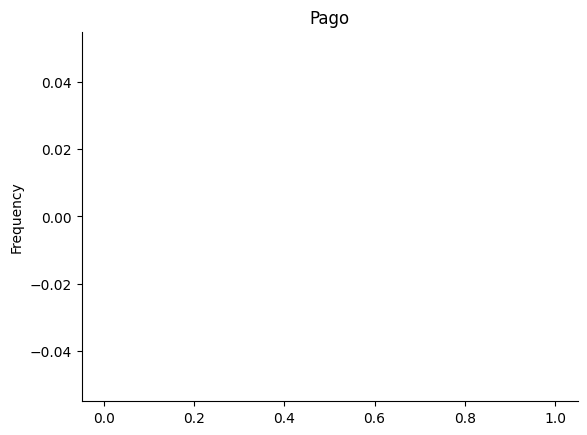

In [3]:
#Frecuencia de pagos
from matplotlib import pyplot as plt
_df_1['Pago'].plot(kind='hist', bins=20, title='Pago')
plt.gca().spines[['top', 'right',]].set_visible(False)

También se ejecuta un histograma de los deudores, pero los valores de deduores representan un identificador por lo que no entregan información para posteriormente detectar patrones aunque para la predicción será necesario ir agrupando los deudores.

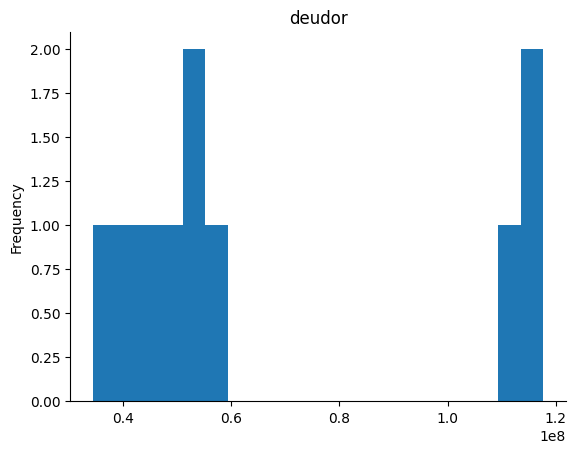

In [4]:
#Frecuencia del deudor
from matplotlib import pyplot as plt
_df_0['deudor'].plot(kind='hist', bins=20, title='deudor')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Distribuciones categóricas

En este punto se encuentra un gráfico con la frecuencia del tipo de gestión que se aplicó en los contactos con los deudores, donde se puede apreciar que la gestión negativa presenta una amplia mayoría con respecto a los demás.

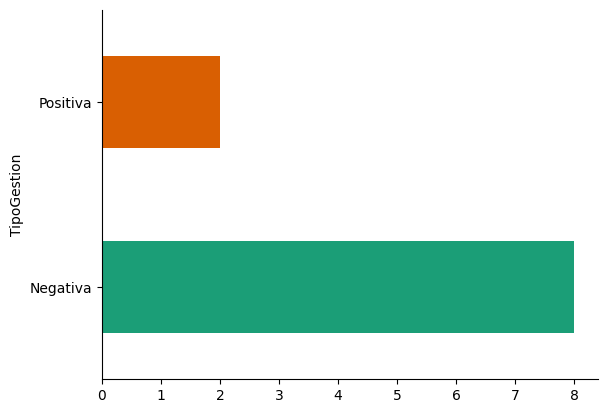

In [5]:
#Categorías TipoGestion
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('TipoGestion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

En este punto se visualiza la frecuencia de tipo de contacto que se aplicó a cada deudor, donde se aprecia que el Sin Contacto abarca la mayor parte de la frecuencia en el proceso de cobranzas

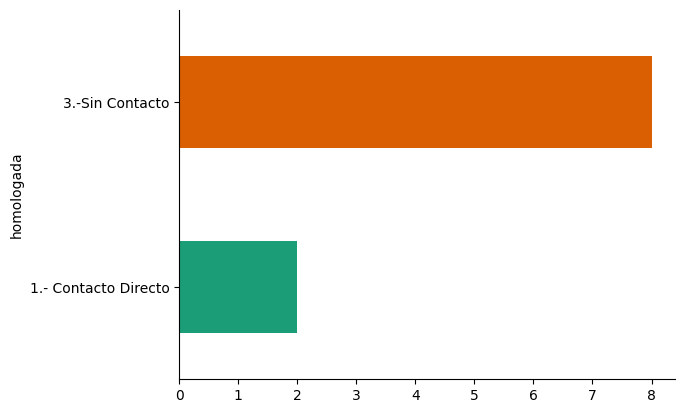

In [6]:
#Categorías homologada
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('homologada').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Información de los datos

Se muestra la información de las columnas del dataframe donde se aprecia el nombre de la columna, los valores no nulos y el tipo de dato.

In [7]:
#Información de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   fecha        1048575 non-null  object 
 1   id_cliente   1048569 non-null  float64
 2   deudor       1048575 non-null  int64  
 3   homologada   1048569 non-null  object 
 4   TipoGestion  1048575 non-null  object 
 5   Descripcion  1048575 non-null  object 
 6   Periodos     1048575 non-null  int64  
 7   Pago         15134 non-null    float64
 8   fecha_pago   15134 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 72.0+ MB


Se verifica la cantidad de valores nulos dentro del dataframe donde se aprecia que las columnas id_cliente y homologada contienen valores NaN. Además de Pago y fecha_pago que abarcan una gran cantidad de estos valores y se debe a que hay deudores que no pagaron al momento del contacto por lo que no se registra ningún monto y por lo mismo la fecha de pago

In [8]:
#Verificar la cantidad de nulos
df.isna().sum()

,0
fecha,0
id_cliente,6
deudor,0
homologada,6
TipoGestion,0
Descripcion,0
Periodos,0
Pago,1033441
fecha_pago,1033441


Se verifica los valores únicos de cada columna para verificar si hay duplicidad de datos. Hay posible deudores repetidos pero con diferente información.

In [9]:
#Codigo para ver los valores unicos de cada columna
df.nunique()

,0
fecha,11224
id_cliente,4
deudor,86188
homologada,6
TipoGestion,13
Descripcion,44
Periodos,1
Pago,638
fecha_pago,27


In [10]:
#Codigo para ver la distribución de los datos
df.describe()

,id_cliente,deudor,Periodos,Pago
count,1.048569e+06,1.048575e+06,1048575.0,1.513400e+04
mean,3.941595e+08,9.376376e+07,202408.0,7.023848e+04
std,2.237563e+08,3.162198e+07,0.0,3.023123e+05
min,1.233795e+08,5.925800e+05,202408.0,1.000000e+00
25%,1.233795e+08,7.023695e+07,202408.0,1.720000e+03
50%,5.790580e+08,9.240866e+07,202408.0,8.356000e+03
75%,5.790580e+08,1.188313e+08,202408.0,6.172100e+04
max,5.790581e+08,2.941620e+08,202408.0,5.098860e+06


### Matriz de correlación

Se visualiza la matriz de correlación para ver coómo se relacionan las columnas unas con otras y ver si pueden influir posteriormente en la predicción.

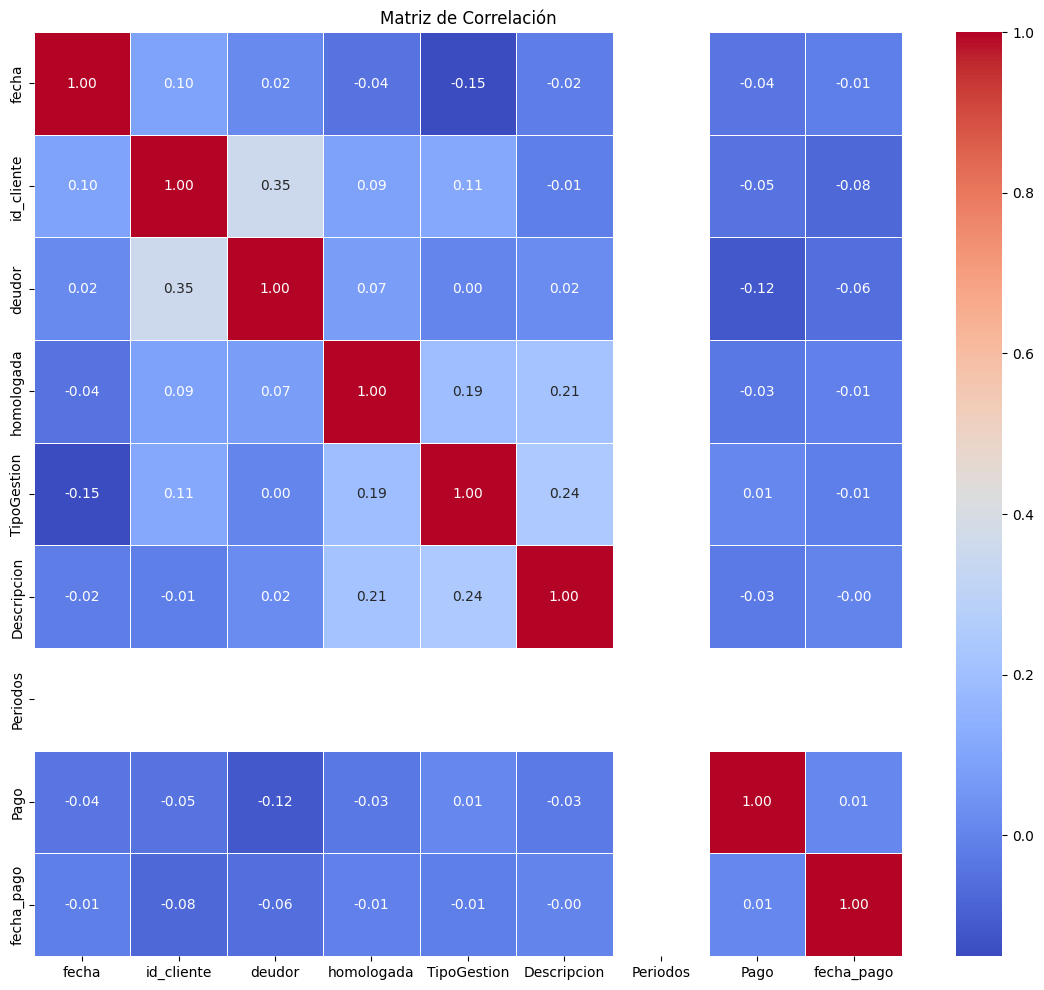

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Supongamos que el DataFrame original se llama 'df'
# Crear una copia del DataFrame para evitar modificar el original
df_copy = df.copy()

# Convertir las columnas categóricas a numéricas usando LabelEncoder
label_encoders = {}
for col in df_copy.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df_copy[col] = label_encoders[col].fit_transform(df_copy[col])

# Asegurarse de que todas las columnas sean de tipo float64
df_copy = df_copy.astype(float)

# Calcular la matriz de correlación
correlation_matrix = df_copy.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Histogramas de cada columna

En este punto se visualizan los gráficos de todas las columnas presentes en el dataframe para ver su distribución de forma más general.

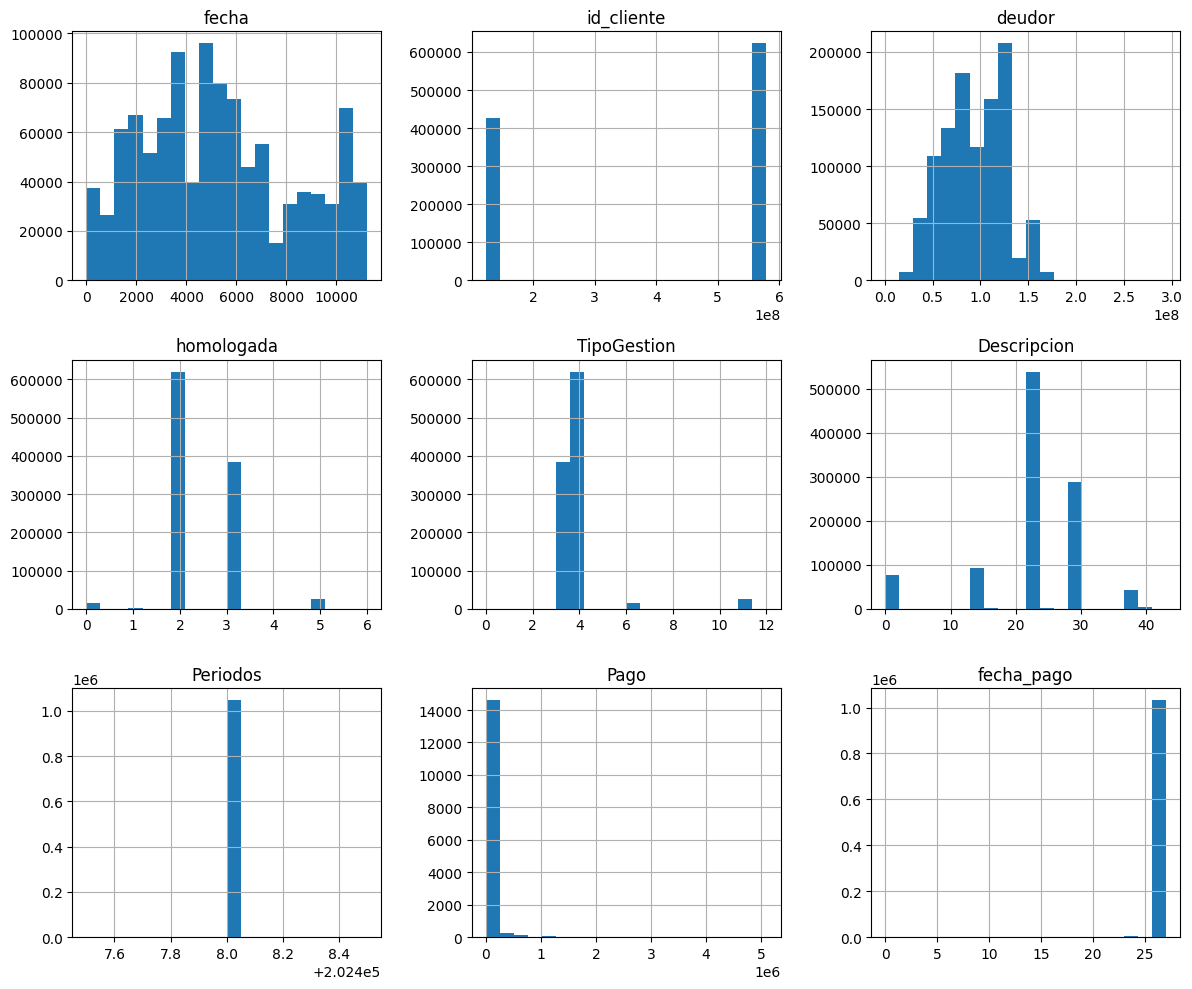

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar columnas numéricas y categóricas
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_copy.select_dtypes(include=['object']).columns

# Crear histogramas para las columnas numéricas
df_copy[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Mostrar gráficos de barras para las columnas categóricas
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df_copy[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# Fase 3: Data Preparation

In [13]:
df.head()

,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
1,01-08-2024 9:10,579058038.0,52268294,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
2,01-08-2024 9:10,579058038.0,55801490,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
3,01-08-2024 9:10,579058038.0,47055326,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
4,01-08-2024 9:10,579058038.0,55078706,1.- Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,NaN,NaN


### Primera copia del dataframe

In [14]:
df_copy = df.copy()
df_copy.head()

,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
1,01-08-2024 9:10,579058038.0,52268294,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
2,01-08-2024 9:10,579058038.0,55801490,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
3,01-08-2024 9:10,579058038.0,47055326,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
4,01-08-2024 9:10,579058038.0,55078706,1.- Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,NaN,NaN


Se eliminan caracteres de la columna 'homologada' para que no interfieran posteriormente en el proceso de transformación

In [15]:
import pandas as pd
import re

# Función para eliminar números y caracteres especiales del nombre de la acción
def limpiar_accion(homologada):
    if isinstance(homologada, str):  # Verificar si el valor es una cadena
        # Usamos una expresión regular para quitar números, puntos y guiones
        return re.sub(r'\d+[\.-]*', '', homologada).strip()
    else:
        return homologada  # Si no es una cadena, devolver el valor tal como está

# Aplicar la función a la columna 'homologada'
df_copy['homologada'] = df_copy['homologada'].apply(limpiar_accion)

# Mostrar el DataFrame actualizado
df_copy.head(50000)


,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
1,01-08-2024 9:10,579058038.0,52268294,Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
2,01-08-2024 9:10,579058038.0,55801490,Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
3,01-08-2024 9:10,579058038.0,47055326,Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
4,01-08-2024 9:10,579058038.0,55078706,Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,NaN,NaN
...,...,...,...,...,...,...,...,...,...
49995,02-08-2024 12:01,579058038.0,58102712,Herramientas Masivas,EMAIL,ENVIO EMAIL COMERCIAL,202408,NaN,NaN
49996,02-08-2024 12:01,579058038.0,58071164,Herramientas Masivas,EMAIL,ENVIO EMAIL COMERCIAL,202408,NaN,NaN
49997,02-08-2024 12:01,579058038.0,58058096,Herramientas Masivas,EMAIL,ENVIO EMAIL COMERCIAL,202408,NaN,NaN
49998,02-08-2024 12:01,579058038.0,35377544,Herramientas Masivas,EMAIL,ENVIO EMAIL COMERCIAL,202408,NaN,NaN


In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   fecha        1048575 non-null  object 
 1   id_cliente   1048569 non-null  float64
 2   deudor       1048575 non-null  int64  
 3   homologada   1048569 non-null  object 
 4   TipoGestion  1048575 non-null  object 
 5   Descripcion  1048575 non-null  object 
 6   Periodos     1048575 non-null  int64  
 7   Pago         15134 non-null    float64
 8   fecha_pago   15134 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 72.0+ MB


In [17]:
df_copy.isna().sum()

,0
fecha,0
id_cliente,6
deudor,0
homologada,6
TipoGestion,0
Descripcion,0
Periodos,0
Pago,1033441
fecha_pago,1033441


Se imputa la variable 'Pago' por 0 ya que los valores NaN representan que el deudor no pagó al momento del contacto o llamado y al no haber un monto asociado.

In [18]:
#Imputación por 0 de la variable 'Pago'
df_copy['Pago'] = df_copy['Pago'].fillna(0)

### Segunda copia del dataframe

In [19]:
df_copy2 = df_copy.copy()
df_copy2.head()

,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,Sin Contacto,Negativa,BUZON DE VOZ,202408,0.0,NaN
1,01-08-2024 9:10,579058038.0,52268294,Sin Contacto,Negativa,NO CONTESTA,202408,0.0,NaN
2,01-08-2024 9:10,579058038.0,55801490,Sin Contacto,Negativa,BUZON DE VOZ,202408,0.0,NaN
3,01-08-2024 9:10,579058038.0,47055326,Sin Contacto,Negativa,NO CONTESTA,202408,0.0,NaN
4,01-08-2024 9:10,579058038.0,55078706,Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,0.0,NaN


### Dataframe que agrupa los datos por el deudor

Se agrupan las columnas por el deudor y así reducir la cantidad de filas del dataframe y el tiempo de ejecución de los modelos posteriormente.

In [20]:
# Agrupar por la columna 'deudor' y aplicar funciones específicas para cada columna
df_agrupado = df_copy2.groupby('deudor').agg({
    'Pago': 'sum',  # Sumar los montos de Pago
    'fecha': lambda x: ', '.join(map(str, x.unique())),
    'fecha_pago': lambda x: ', '.join(map(str, x.unique())),
    'id_cliente': lambda x: ', '.join(map(str, x.unique())),  # Concatenar los id_cliente únicos separados por coma
    'homologada': lambda x: ', '.join(map(str, x.unique())),  # Tomar el primer valor de homologada (puedes cambiar esto si lo necesitas) # Tomar el primer valor de AccionCobranza
    'TipoGestion': lambda x: ', '.join(map(str, x.unique())),  # Tomar el primer valor de TipoGestion
    'Descripcion': lambda x: ', '.join(map(str, x.unique()))  # Tomar el primer valor de Descripcion
}).reset_index()

# Mostrar el DataFrame agrupado
df_agrupado.head()

,deudor,Pago,fecha,fecha_pago,id_cliente,homologada,TipoGestion,Descripcion
0,592580,0.0,"21-08-2024 11:06, 21-08-2024 16:34",nan,579058038.0,"Contacto Indirecto, Sin Contacto","Positiva-Indi, Negativa","VOLVER A LLAMAR, NO CONTESTA"
1,8620334,0.0,12-08-2024 17:30,nan,123379488.0,Sin Contacto,Negativa,SIN TELEFONOS
2,12615620,0.0,"06-08-2024 8:00, 07-08-2024 16:11, 08-08-2024 ...",nan,579058038.0,"Sin Gestion, Sin Contacto","Sistema, Negativa","SE INGRESA CARGA, OCUPADO/CONGESTION, NO CONTE..."
3,12865394,0.0,"06-08-2024 8:00, 12-08-2024 17:30",nan,579058038.0,"Sin Gestion, Sin Contacto","Sistema, Negativa","SE INGRESA CARGA, SIN TELEFONOS"
4,12957074,0.0,"03-08-2024 17:12, 05-08-2024 18:59",nan,579058038.0,Sin Contacto,Negativa,OCUPADO/CONGESTION


In [21]:
df_agrupado.nunique()

,0
deudor,86188
Pago,704
fecha,47407
fecha_pago,28
id_cliente,5
homologada,175
TipoGestion,292
Descripcion,6096


In [22]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deudor       86188 non-null  int64  
 1   Pago         86188 non-null  float64
 2   fecha        86188 non-null  object 
 3   fecha_pago   86188 non-null  object 
 4   id_cliente   86188 non-null  object 
 5   homologada   86188 non-null  object 
 6   TipoGestion  86188 non-null  object 
 7   Descripcion  86188 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
# Crear una nueva columna binaria 'PagoBinario' en df_copy
df_agrupado['PagoBinario'] = df_agrupado['Pago'].apply(lambda x: 1 if x > 0 else 0)

# Mostrar los primeros registros para verificar
df_agrupado['PagoBinario'].head()

,PagoBinario
0,0
1,0
2,0
3,0
4,0


In [24]:
df_agrupado['PagoBinario'].unique()

array([0, 1])

In [25]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deudor       86188 non-null  int64  
 1   Pago         86188 non-null  float64
 2   fecha        86188 non-null  object 
 3   fecha_pago   86188 non-null  object 
 4   id_cliente   86188 non-null  object 
 5   homologada   86188 non-null  object 
 6   TipoGestion  86188 non-null  object 
 7   Descripcion  86188 non-null  object 
 8   PagoBinario  86188 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 5.9+ MB


In [26]:
df_agrupado.head()

,deudor,Pago,fecha,fecha_pago,id_cliente,homologada,TipoGestion,Descripcion,PagoBinario
0,592580,0.0,"21-08-2024 11:06, 21-08-2024 16:34",nan,579058038.0,"Contacto Indirecto, Sin Contacto","Positiva-Indi, Negativa","VOLVER A LLAMAR, NO CONTESTA",0
1,8620334,0.0,12-08-2024 17:30,nan,123379488.0,Sin Contacto,Negativa,SIN TELEFONOS,0
2,12615620,0.0,"06-08-2024 8:00, 07-08-2024 16:11, 08-08-2024 ...",nan,579058038.0,"Sin Gestion, Sin Contacto","Sistema, Negativa","SE INGRESA CARGA, OCUPADO/CONGESTION, NO CONTE...",0
3,12865394,0.0,"06-08-2024 8:00, 12-08-2024 17:30",nan,579058038.0,"Sin Gestion, Sin Contacto","Sistema, Negativa","SE INGRESA CARGA, SIN TELEFONOS",0
4,12957074,0.0,"03-08-2024 17:12, 05-08-2024 18:59",nan,579058038.0,Sin Contacto,Negativa,OCUPADO/CONGESTION,0


### Creación de df_final con las columnas binarias

Se crean las columnas binarias de las variables homologada y TipoGestion para que el modelo detecte patrones de forma más fácil.

In [27]:
# Importar las librerías necesarias
import pandas as pd

# Aplicar One-Hot Encoding a las columnas 'homologada', 'TipoGestion' y 'Descripcion'
df_encoded = pd.get_dummies(df_copy2, columns=['homologada', 'TipoGestion'], prefix=['homologada', 'TipoGestion'])

# Agrupar por 'deudor' de nuevo, sumando los valores binarios para cada categoría
df_final = df_encoded.groupby('deudor').max().reset_index()

# Mostrar el resultado final con las variables binarias
df_final.head()


,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,TipoGestion_EMAIL,TipoGestion_Negativa,TipoGestion_Negativa-Com,TipoGestion_Positiva,TipoGestion_Positiva-Adm,TipoGestion_Positiva-Com,TipoGestion_Positiva-Indi,TipoGestion_Positiva-Wsp,TipoGestion_Sistema,TipoGestion_Terreno
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,False,True,False,False,False,False,True,False,False,False
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Creación de variable 'PagoBinario'

Se crea la variable 'PagoBinario' como un indicador de si el deudor paga o no paga

In [28]:
# Crear una nueva columna binaria 'PagoBinario' en df_copy
df_final['PagoBinario'] = df_final['Pago'].apply(lambda x: 1 if x > 0 else 0)

# Mostrar los primeros registros para verificar
df_final['PagoBinario'].head()

,PagoBinario
0,0
1,0
2,0
3,0
4,0


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   deudor                           86188 non-null  int64  
 1   fecha                            86188 non-null  object 
 2   id_cliente                       86182 non-null  float64
 3   Descripcion                      86188 non-null  object 
 4   Periodos                         86188 non-null  int64  
 5   Pago                             86188 non-null  float64
 6   fecha_pago                       748 non-null    object 
 7   homologada_Administrativa        86188 non-null  bool   
 8   homologada_Contacto Directo      86188 non-null  bool   
 9   homologada_Contacto Indirecto    86188 non-null  bool   
 10  homologada_Herramientas Masivas  86188 non-null  bool   
 11  homologada_Sin Contacto          86188 non-null  bool   
 12  homologada_Sin Ges

### Asignación de acciones de cobranza según la descripción

En este punto se van asignando las acciones de cobranza a las cuales se quere saber la mínima eficiente para grupos de deudores basadas en la descripción

In [30]:
import pandas as pd

# Suponiendo que df_copy2 es tu DataFrame original y ya contiene las columnas de descripciones

# Diccionario para mapear descripciones a acciones
accion_dict = {
    'Sin acciones': [
        'CORTAN LLAMADO',
        'SIN TELEFONOS',
        'TELEFONO VACANTE/MALO/FUERA DE SERVICIO',
        'NO CORRESPONDE TELEFONO/NO TRABAJA ALLI/NO LO CONOCEN',
        'NO CORRESPONDE TELEFONO/NO VIVE ALLI/NO LO CONOCEN',
        'NO RECIBEN RECADOS',
        'NO QUIERE PAGA/DESCONOCE LA DEUDA',
        'DEUDOR NO INFORMADO',
        'DICE QUE PAGO/ABONO/RENEGOCIO',
        'NO PUEDE PAGAR',
        'OCUPADO/CONGESTION'
    ],
    'Correo electrónico': [
        'EMAIL - DICE QUE PAGO/ABONO/RENEGOCIO',
        'ENVIO EMAIL COMERCIAL',
        'EMAIL - CONTACTO DEUDOR',
        'EMAIL - COMPROMISO DE PAGO',
        'EMAIL - SE CONFIRMA PAGO'
    ],
    'SMS': [
        'COMENTARIO',  # Ejemplo de un comentario que se incluirá en SMS
        'COMENTARIO - COMPROMISO PAGO',
        'COMENTARIO - CONTACTO DEUDOR',
        'COMENTARIO - NO QUIERE PAGAR'
        # Agrega más descripciones relacionadas a SMS aquí si es necesario
    ],
    'Whatsapp': [
        'WHATSAPP - CONTACTO DEUDOR',
        'WHATSAPP - COMPROMISO DE PAGO'
    ],
    'Llamada por bot': [
        'BUZON DE VOZ',
        'NO CONTESTA'
    ],
    'Llamada directa': [
        'CONTACTO DEUDOR',
        'COMPROMISO DE PAGO',
        'RECADO EN CASA',
        'RECADO EN OFICINA',
        'PIDE VOLVER A LLAMAR',
        'VOLVER A LLAMAR',
        'SE CONFIRMA PAGO',
        'CLIENTE REALIZARA PLAN DE PAGOS',
        'COMPROMISO PAGO - TRANSFERENCIA DE FONDOS',
        'TERCERO ENTREGA NUEVO TELEFONO',
        'CLIENTE IRA A LA SUCURSAL',
        'RESPUESTA COBRADOR EN TERRENO',
        'COMPROMISO PAGO - COORDINACION'
    ],
    'Acciones judiciales': [
        'DEUDOR FALLECIDO ( PRESENTA CERTIFICADO )',
        'POSIBLE RECLAMO'
    ]
}

# Crear columnas binarias para cada acción
for accion in accion_dict.keys():
    df_final[accion] = df_final['Descripcion'].apply(
        lambda x: 1 if any(desc in x for desc in accion_dict[accion]) else 0
    )

# Mostrar el DataFrame resultante
df_final.head()


,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,TipoGestion_Sistema,TipoGestion_Terreno,PagoBinario,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,False,False,0,0,0,0,0,0,1,0
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,False,0,1,0,0,0,0,0,0
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,True,False,0,0,0,0,0,0,0,0
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,True,False,0,1,0,0,0,0,0,0
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,False,False,0,1,0,0,0,0,0,0


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   deudor                           86188 non-null  int64  
 1   fecha                            86188 non-null  object 
 2   id_cliente                       86182 non-null  float64
 3   Descripcion                      86188 non-null  object 
 4   Periodos                         86188 non-null  int64  
 5   Pago                             86188 non-null  float64
 6   fecha_pago                       748 non-null    object 
 7   homologada_Administrativa        86188 non-null  bool   
 8   homologada_Contacto Directo      86188 non-null  bool   
 9   homologada_Contacto Indirecto    86188 non-null  bool   
 10  homologada_Herramientas Masivas  86188 non-null  bool   
 11  homologada_Sin Contacto          86188 non-null  bool   
 12  homologada_Sin Ges

### Creación de variable 'Cantidad_AccionesCobranza'

Se crea la variable 'Cantidad_AccionesCobranza' que cuenta las acciones de cobranza aplicadas a cada deudor

In [32]:
import pandas as pd

# Sumar las columnas binarias para crear una nueva columna 'Cantidad_Gestiones'
df_final['Cantidad_AccionesCobranza'] = df_final[['Sin acciones', 'Correo electrónico', 'SMS', 'Whatsapp', 'Llamada por bot', 'Llamada directa', 'Acciones judiciales']].sum(axis=1)

# Mostrar el DataFrame resultante con la nueva columna
df_final.head()


,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,TipoGestion_Terreno,PagoBinario,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,False,0,0,0,0,0,0,1,0,1
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,0,1,0,0,0,0,0,0,1
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,False,0,0,0,0,0,0,0,0,0
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,0,1,0,0,0,0,0,0,1
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,False,0,1,0,0,0,0,0,0,1


In [33]:
df_final['Cantidad_AccionesCobranza'].unique()

array([1, 0, 2])

In [34]:
df_final['Cantidad_AccionesCobranza'].isna().sum()

0

### Creación de variable 'Cantidad_Gestiones'

Se crea la variable 'Cantidad_Gestiones' que proporciona la cantidad de llamados realizados hacia el deudor

In [35]:
import pandas as pd

# Supongamos que df_copy2 es tu DataFrame y ya contiene las columnas binarias para los tipos de gestión
# Asegúrate de que las columnas binarias estén en el DataFrame antes de ejecutar este código

# Sumar todas las columnas de tipo de gestión para crear una nueva columna de cantidad de gestiones
df_final['Cantidad_Gestiones'] = df_final[['TipoGestion_Administrativa',
                                             'TipoGestion_Compromiso',
                                             'TipoGestion_Compromiso-Com',
                                             'TipoGestion_EMAIL',
                                             'TipoGestion_Negativa',
                                             'TipoGestion_Negativa-Com',
                                             'TipoGestion_Positiva',
                                             'TipoGestion_Positiva-Adm',
                                             'TipoGestion_Positiva-Com',
                                             'TipoGestion_Positiva-Indi',
                                             'TipoGestion_Positiva-Wsp',
                                             'TipoGestion_Sistema',
                                             'TipoGestion_Terreno']].sum(axis=1)

# Mostrar el DataFrame resultante con la nueva columna
df_final[['Cantidad_Gestiones']].head()


,Cantidad_Gestiones
0,2
1,1
2,2
3,2
4,1


In [36]:
df_final['Cantidad_Gestiones'].unique()

array([2, 1, 3, 4, 5, 7, 6, 8])

In [37]:
df_final['Cantidad_Gestiones'].isna().sum()

0

In [38]:
df_final.head()

,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,PagoBinario,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,0,0,0,0,0,0,1,0,1,2
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,1
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,0,0,0,0,0,0,0,0,0,2
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,2
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,1


### Creación de variable 'gestion_positiva'

Se crea la variable 'gestion_positiva' para indicar si el proceso de contacto fue exitosa tomando en cuenta si pagó o no pago finalmente el deudor.

In [39]:
import pandas as pd

# Supongamos que df_copy2 es tu DataFrame y que ya contiene la columna 'Pago' en formato binario
# Creamos la columna 'gestion_positiva' basada en la columna 'Pago'

df_final['gestion_positiva'] = df_final['Pago'].apply(lambda x: 1 if x == 1 else 0)

# Mostrar el DataFrame resultante con la nueva columna
df_final[['Pago', 'gestion_positiva']].head()


,Pago,gestion_positiva
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [40]:
df_final['gestion_positiva'].unique()

array([0, 1])

In [41]:
df_final['gestion_positiva'].isna().sum()

0

In [42]:
df_final.head()

,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones,gestion_positiva
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,0,0,0,0,0,1,0,1,2,0
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,1,0,0,0,0,0,0,1,1,0
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,0,0,0,0,0,0,0,0,2,0
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,1,0,0,0,0,0,0,1,2,0
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,1,0,0,0,0,0,0,1,1,0


### Trasformación de variables booleanas a int

Se realiza la transformación a las variables booleanas al haberlas pasado a binarias ya que los modelos toman en consideración sólo variables numéricas para su entrenamiento.

In [43]:
# Definir las columnas booleanas a convertir en enteros
boolean_columns = [
    'homologada_Administrativa', 'homologada_Contacto Directo', 'homologada_Contacto Indirecto',
    'homologada_Herramientas Masivas', 'homologada_Sin Contacto', 'homologada_Sin Gestion',
    'TipoGestion_Administrativa', 'TipoGestion_Compromiso', 'TipoGestion_Compromiso-Com',
    'TipoGestion_EMAIL', 'TipoGestion_Negativa', 'TipoGestion_Negativa-Com',
    'TipoGestion_Positiva', 'TipoGestion_Positiva-Adm', 'TipoGestion_Positiva-Com',
    'TipoGestion_Positiva-Indi', 'TipoGestion_Positiva-Wsp', 'TipoGestion_Sistema',
    'TipoGestion_Terreno'
]

# Convertir las columnas booleanas a enteros
df_final[boolean_columns] = df_final[boolean_columns].astype(int)

# Verificar la conversión
print(df_final[boolean_columns].dtypes)

homologada_Administrativa          int64
homologada_Contacto Directo        int64
homologada_Contacto Indirecto      int64
homologada_Herramientas Masivas    int64
homologada_Sin Contacto            int64
homologada_Sin Gestion             int64
TipoGestion_Administrativa         int64
TipoGestion_Compromiso             int64
TipoGestion_Compromiso-Com         int64
TipoGestion_EMAIL                  int64
TipoGestion_Negativa               int64
TipoGestion_Negativa-Com           int64
TipoGestion_Positiva               int64
TipoGestion_Positiva-Adm           int64
TipoGestion_Positiva-Com           int64
TipoGestion_Positiva-Indi          int64
TipoGestion_Positiva-Wsp           int64
TipoGestion_Sistema                int64
TipoGestion_Terreno                int64
dtype: object


### Verificación de outliers

Se visualizan diagramas de cajas para verificar la presencia de outliers o valores atípicos que podrían influir en el resultado de los modelos. En este caso se aprecia que la variable Pago tiene una gran cantidad de estos valores pero al tener la variable binaria PagoBinario, el monto pagado empieza a ser irrelevante para el modelo.

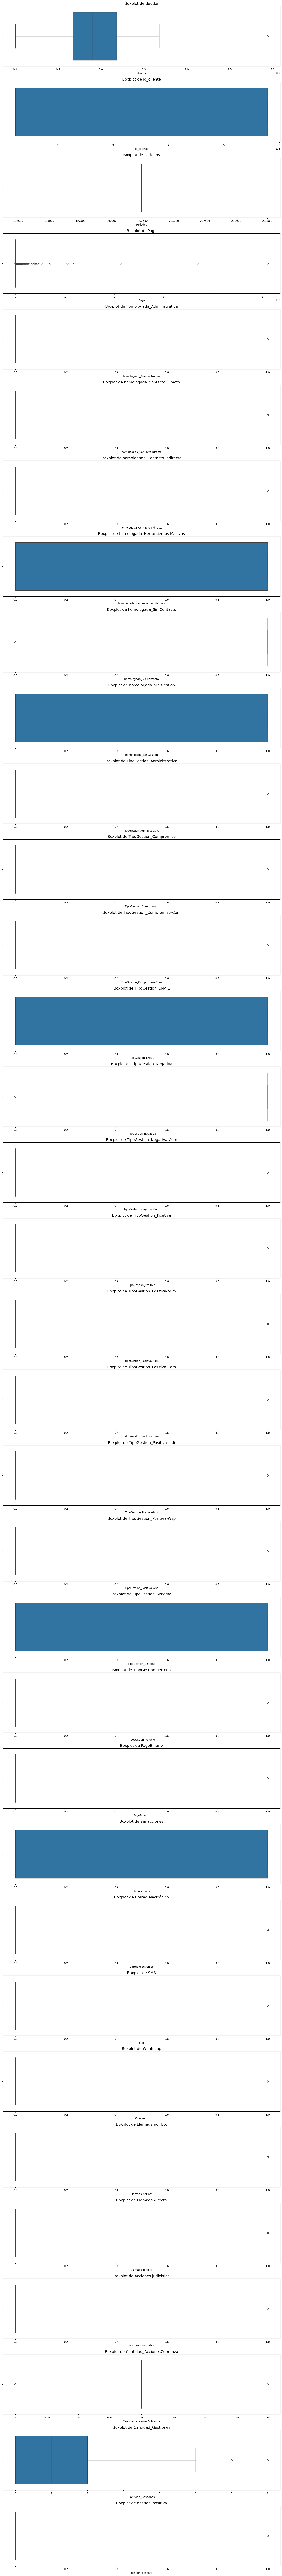

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas
df_numeric = df_final.select_dtypes(include=['float64', 'int64'])

# Crear gráficos de caja para todas las columnas numéricas
plt.figure(figsize=(15, len(df_numeric.columns) * 4))  # Ajusta el tamaño según la cantidad de columnas
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(len(df_numeric.columns), 1, i)  # Crear subplots dinámicamente
    sns.boxplot(data=df_numeric, x=column)
    plt.title(f'Boxplot de {column}', fontsize=14)
    plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Fase 4: Modeling

## Modelo k-means

### Método del codo

Se realiza el método del codo para visualizar la cantidad de clusters eficientes para el modelo

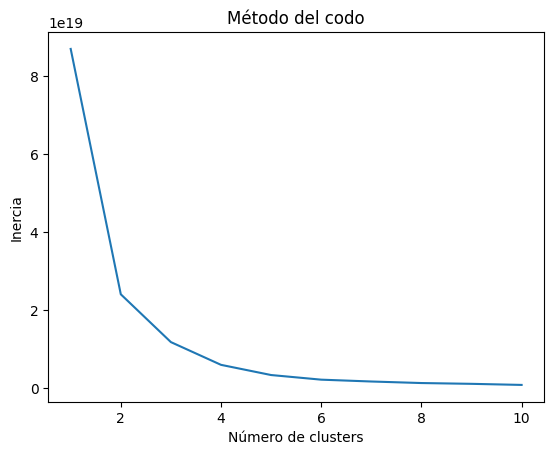

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Excluir columnas no relevantes como id_cliente y fecha_pago
cols_to_exclude = ['id_cliente', 'fecha_pago']  # Puedes agregar más columnas si es necesario
df_numeric = df_final.drop(columns=cols_to_exclude, errors='ignore')

# Filtrar solo las columnas numéricas (float64 o int64) para aplicar KMeans
df_numeric = df_numeric.select_dtypes(include=['float64', 'int64'])

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

### Selección de variables relevantes

Se seleccionan las variables relevantes para el entrenamiento del modelo k-menas junto con apreciar de mejor forma el método del codo.

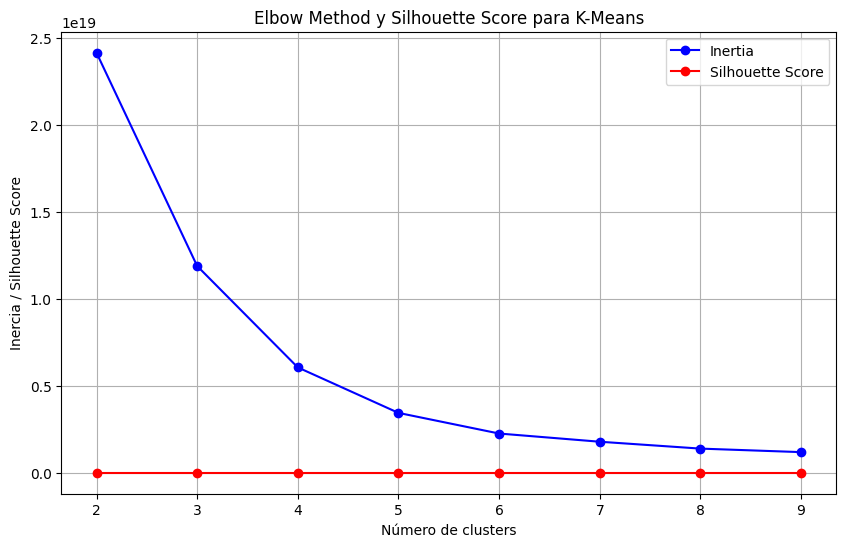

In [46]:
# Codigo para determinar el Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

# Seleccionar los datos de df_copy
df_selected = df_final

# Seleccionar las variables relevantes
selected_features = [
    'deudor',
    'PagoBinario',
    'TipoGestion_Administrativa',
    'TipoGestion_Compromiso',
    'TipoGestion_Compromiso-Com',
    'TipoGestion_EMAIL',
    'TipoGestion_Negativa',
    'TipoGestion_Negativa-Com',
    'TipoGestion_Positiva',
    'TipoGestion_Positiva-Adm',
    'TipoGestion_Positiva-Com',
    'TipoGestion_Positiva-Indi',
    'TipoGestion_Positiva-Wsp',
    'TipoGestion_Sistema',
    'TipoGestion_Terreno',
    'Sin acciones',
    'Correo electrónico',
    'SMS',
    'Whatsapp',
    'Llamada por bot',
    'Llamada directa',
    'Acciones judiciales',
    'Cantidad_AccionesCobranza',
    'Cantidad_Gestiones',
    'gestion_positiva'
]



# Filtrar el DataFrame con las variables seleccionadas
df_filtered = df_selected[selected_features]

# Preprocesamiento: Normalización
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_filtered)

# K-Means con selección de clusters usando Elbow Method
inertia_values = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filtered)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_filtered, kmeans.labels_))

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, 'bo-', label='Inertia')
plt.plot(k_values, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia / Silhouette Score')
plt.title('Elbow Method y Silhouette Score para K-Means')
plt.legend()
plt.grid()
plt.show()

A continuación, se visualizan la distribución de los clusters con valores diferentes de k junto con ver la ubicación de los centroides y que tan separado está un cluster de otro.

### K-means (3 clusters)

<ipython-input-48-8b3f3254e063>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans.fit_predict(df_filtered)
<ipython-input-48-8b3f3254e063>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_1'] = pca_components[:, 0]
<ipython-input-48-8b3f3254e063>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

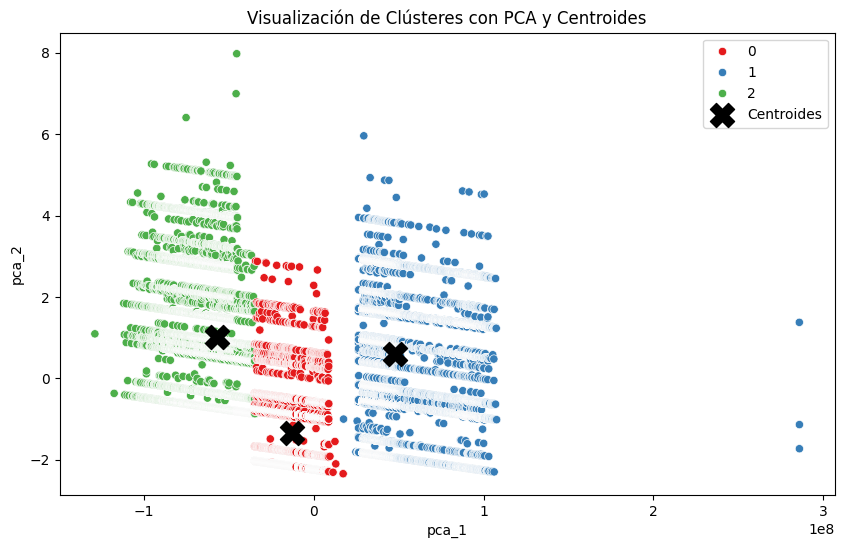

In [48]:
#Modelo k-means con 3 clusters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Aplicación del modelo K-means (con 3 clusters por ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(df_filtered)

# Obtener los centroides del modelo K-means
centroids = kmeans.cluster_centers_

# Reducción de dimensionalidad con PCA a 2 componentes para visualización
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_filtered)

# Agregar las componentes principales al DataFrame para visualización
df_filtered['pca_1'] = pca_components[:, 0]
df_filtered['pca_2'] = pca_components[:, 1]

# Aplicar PCA a los centroides para visualización en 2D
centroids_pca = pca.transform(centroids)

# Visualización de los clusters con PCA y los centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df_filtered, palette='Set1', legend='full')

# Graficar los centroides en el mismo gráfico
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='black', marker='X', label='Centroides')
plt.title('Visualización de Clústeres con PCA y Centroides')
plt.legend()
plt.show()

### K-means (4 clusters)

<ipython-input-50-87e7cf0b43fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans4.fit_predict(df_filtered)
<ipython-input-50-87e7cf0b43fc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_1'] = pca_components[:, 0]
<ipython-input-50-87e7cf0b43fc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

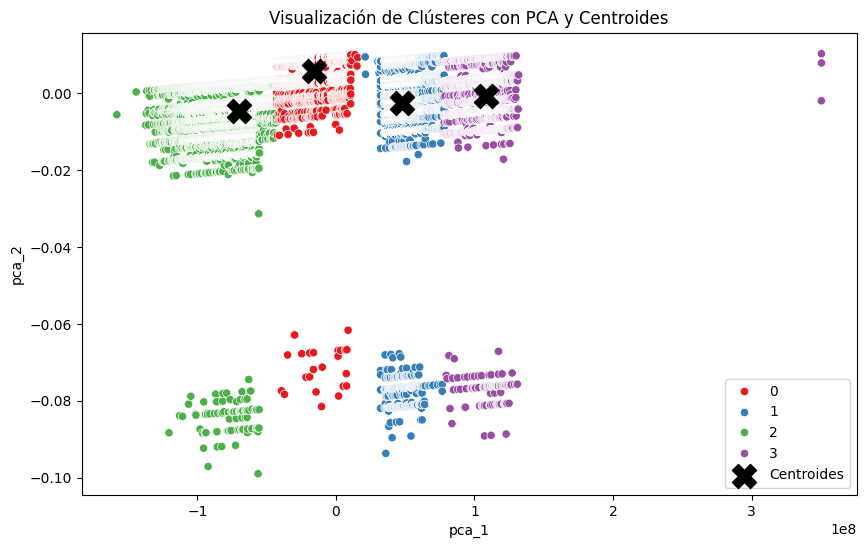

In [50]:
#Modelo k-means con 4 clusters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Aplicación del modelo K-means (con 4 clusters por ejemplo)
kmeans4 = KMeans(n_clusters=4, random_state=42)
df_filtered['cluster'] = kmeans4.fit_predict(df_filtered)

# Obtener los centroides del modelo K-means
centroids = kmeans4.cluster_centers_

# Reducción de dimensionalidad con PCA a 2 componentes para visualización
pca4 = PCA(n_components=3)
pca_components = pca4.fit_transform(df_filtered)

# Agregar las componentes principales al DataFrame para visualización
df_filtered['pca_1'] = pca_components[:, 0]
df_filtered['pca_2'] = pca_components[:, 1]

# Aplicar PCA a los centroides para visualización en 2D
centroids_pca4 = pca4.transform(centroids)

# Visualización de los clusters con PCA y los centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df_filtered, palette='Set1', legend='full')

# Graficar los centroides en el mismo gráfico
plt.scatter(centroids_pca4[:, 0], centroids_pca4[:, 1], s=300, c='black', marker='X', label='Centroides')
plt.title('Visualización de Clústeres con PCA y Centroides')
plt.legend()
plt.show()

### K-means (5 clusters)

<ipython-input-52-3e698c3cd39a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans5.fit_predict(df_filtered)
<ipython-input-52-3e698c3cd39a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_1'] = pca_components[:, 0]
<ipython-input-52-3e698c3cd39a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

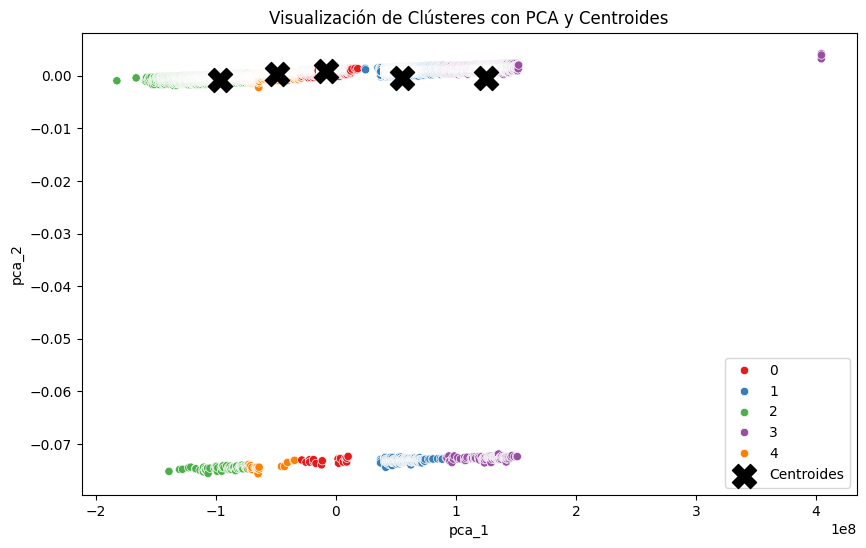

In [52]:
#Modelo k-means con 5 clusters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Normalización de los datos antes de aplicar K-means
# scaler = StandardScaler()
# df_filtered = scaler.fit_transform(df_filtered)

# Aplicación del modelo K-means (con 5 clusters por ejemplo)
kmeans5 = KMeans(n_clusters=5, random_state=42)
df_filtered['cluster'] = kmeans5.fit_predict(df_filtered)

# Obtener los centroides del modelo K-means
centroids = kmeans5.cluster_centers_

# Reducción de dimensionalidad con PCA a 2 componentes para visualización
pca5 = PCA(n_components=3)
pca_components = pca5.fit_transform(df_filtered)

# Agregar las componentes principales al DataFrame para visualización
df_filtered['pca_1'] = pca_components[:, 0]
df_filtered['pca_2'] = pca_components[:, 1]

# Aplicar PCA a los centroides para visualización en 2D
centroids_pca5 = pca5.transform(centroids)

# Visualización de los clusters con PCA y los centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df_filtered, palette='Set1', legend='full')

# Graficar los centroides en el mismo gráfico
plt.scatter(centroids_pca5[:, 0], centroids_pca5[:, 1], s=300, c='black', marker='X', label='Centroides')
plt.title('Visualización de Clústeres con PCA y Centroides')
plt.legend()
plt.show()

### K-means (6 clusters)

<ipython-input-54-62d884ff6726>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans6.fit_predict(df_filtered)
<ipython-input-54-62d884ff6726>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_1'] = pca_components[:, 0]
<ipython-input-54-62d884ff6726>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

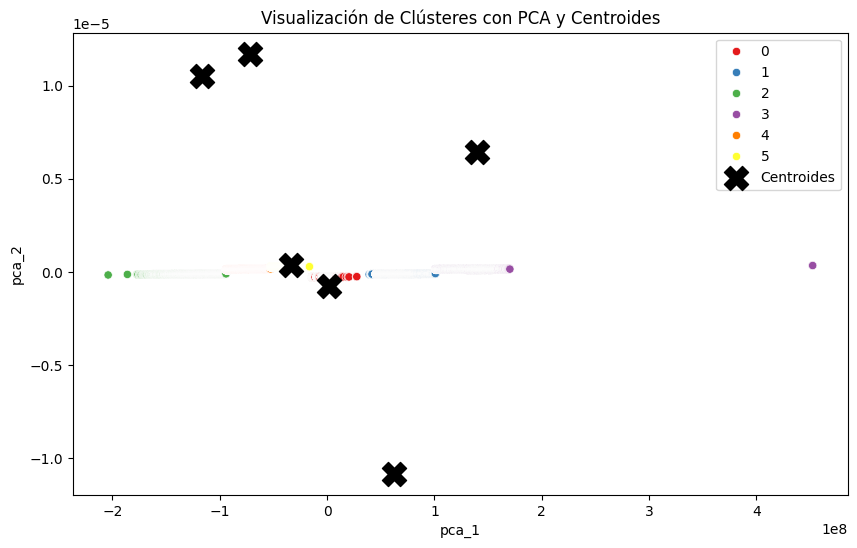

In [54]:
#Modelo k-means con 6 clusters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Aplicación del modelo K-means (con 6 clusters por ejemplo)
kmeans6 = KMeans(n_clusters=6, random_state=42)
df_filtered['cluster'] = kmeans6.fit_predict(df_filtered)

# Obtener los centroides del modelo K-means
centroids = kmeans6.cluster_centers_

# Reducción de dimensionalidad con PCA a 2 componentes para visualización
pca6 = PCA(n_components=3)
pca_components = pca6.fit_transform(df_filtered)

# Agregar las componentes principales al DataFrame para visualización
df_filtered['pca_1'] = pca_components[:, 0]
df_filtered['pca_2'] = pca_components[:, 1]

# Aplicar PCA a los centroides para visualización en 2D
centroids_pca6 = pca6.transform(centroids)

# Visualización de los clusters con PCA y los centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df_filtered, palette='Set1', legend='full')

# Graficar los centroides en el mismo gráfico
plt.scatter(centroids_pca6[:, 0], centroids_pca6[:, 1], s=300, c='black', marker='X', label='Centroides')
plt.title('Visualización de Clústeres con PCA y Centroides')
plt.legend()
plt.show()

### K-means (7 clusters)

<ipython-input-59-77f0ad1b5442>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans7.fit_predict(df_filtered)
<ipython-input-59-77f0ad1b5442>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_1'] = pca_components[:, 0]
<ipython-input-59-77f0ad1b5442>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

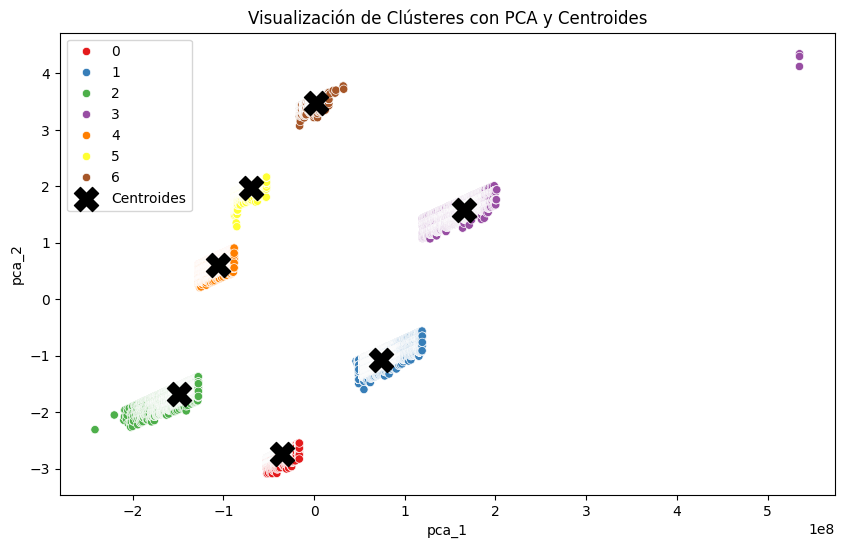

In [59]:
#Modelo k-means con 7 clusters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Normalización de los datos antes de aplicar K-means
# scaler = StandardScaler()
# df_filtered = scaler.fit_transform(df_filtered)

# Aplicación del modelo K-means (con 3 clusters por ejemplo)
kmeans7 = KMeans(n_clusters=7, random_state=42)
df_filtered['cluster'] = kmeans7.fit_predict(df_filtered)

# Obtener los centroides del modelo K-means
centroids = kmeans7.cluster_centers_

# Reducción de dimensionalidad con PCA a 2 componentes para visualización
pca7 = PCA(n_components=3)
pca_components = pca7.fit_transform(df_filtered)

# Agregar las componentes principales al DataFrame para visualización
df_filtered['pca_1'] = pca_components[:, 0]
df_filtered['pca_2'] = pca_components[:, 1]

# Aplicar PCA a los centroides para visualización en 2D
centroids_pca7 = pca7.transform(centroids)

# Visualización de los clusters con PCA y los centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df_filtered, palette='Set1', legend='full')

# Graficar los centroides en el mismo gráfico
plt.scatter(centroids_pca7[:, 0], centroids_pca7[:, 1], s=300, c='black', marker='X', label='Centroides')
plt.title('Visualización de Clústeres con PCA y Centroides')
plt.legend()
plt.show()

In [61]:
#Se agrega el cluster correspondiente a cada deudor
df_final['cluster'] = kmeans7.labels_
df_final.head()

,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones,gestion_positiva,cluster
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,0,0,1,...,0,0,0,0,1,0,1,2,0,2
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,0,1,1,0,2
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,0,0,2,0,2
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,0,1,2,0,2
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,0,1,1,0,2


In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   deudor                           86188 non-null  int64  
 1   fecha                            86188 non-null  object 
 2   id_cliente                       86182 non-null  float64
 3   Descripcion                      86188 non-null  object 
 4   Periodos                         86188 non-null  int64  
 5   Pago                             86188 non-null  float64
 6   fecha_pago                       748 non-null    object 
 7   homologada_Administrativa        86188 non-null  int64  
 8   homologada_Contacto Directo      86188 non-null  int64  
 9   homologada_Contacto Indirecto    86188 non-null  int64  
 10  homologada_Herramientas Masivas  86188 non-null  int64  
 11  homologada_Sin Contacto          86188 non-null  int64  
 12  homologada_Sin Ges

##Modelo LSTM

### Asignación de etiquetas

In [63]:
import pandas as pd

# Suponiendo que df_final ya contiene las columnas de acciones
acciones_columnas = [
    'Sin acciones',
    'Correo electrónico',
    'SMS',
    'Whatsapp',
    'Llamada por bot',
    'Llamada directa',
    'Acciones judiciales'
]

# Crear un diccionario de acciones
acciones_dict = {
    'Sin acciones': 0,
    'Correo electrónico': 1,
    'SMS': 2,
    'Whatsapp': 3,
    'Llamada por bot': 4,
    'Llamada directa': 5,
    'Acciones judiciales': 6
}

# Crear una nueva columna 'etiqueta_accion' que combine las columnas
# Primero, obtenemos la acción correspondiente
df_final['etiqueta_accion'] = df_final[acciones_columnas].idxmax(axis=1)

# Convertir la acción a su correspondiente etiqueta usando el diccionario
df_final['etiqueta_accion'] = df_final['etiqueta_accion'].map(acciones_dict)

# Verificar el resultado
df_final[['etiqueta_accion']].head(10)


,etiqueta_accion
0,5
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [64]:
df_final.head()

,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones,gestion_positiva,cluster,etiqueta_accion
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,0,0,1,...,0,0,0,1,0,1,2,0,2,5
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,1,0,2,0
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,0,2,0,2,0
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,2,0,2,0
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,1,0,2,0


### LSTM Sin balanceo

Se entrena el LSTM sin aplicar técnicas de balanceo y así ver que se puede mejorar posteriormente.

In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Supongamos que ya has creado la columna 'etiqueta_accion' como se describió anteriormente

# Separar características y etiquetas
X = df_final.drop(columns=['etiqueta_accion', 'fecha', 'Descripcion', 'fecha_pago', 'id_cliente'])
y = df_final['etiqueta_accion']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape de los datos para la entrada LSTM (n_samples, timesteps, features)
X_train_reshaped = X_train.reshape((-1, 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))

# Definir el modelo LSTM
model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(np.unique(y)), activation='softmax'))  # Usamos softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
print(model.summary())

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          83,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,167 (360.03 KB)

 Trainable params: 92,167 (360.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9632 - loss: 0.3384 - val_accuracy: 0.9999 - val_loss: 5.4694e-04
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9999 - loss: 4.7196e-04 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 4.0184e-04
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 3.0266e-04 - val_accuracy: 0.9999 - val_loss: 2.6445e-04
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 1.0000 - loss: 1.3453e-04 - val_accuracy: 0.9999 - val_loss: 2.6425e-04
Epoch 6/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 1.0000 - loss: 6.9491e-05 - val_accuracy: 0.9999 - val_loss: 2.6466e-04
Epoch 7/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 1.0000 - loss: 8.9568e-05 - val_accuracy: 0.9999 - val_loss: 2.6148e-04
Epoch 8/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - 

### LSTM (1° balanceo)

Se entrena el modelo aplicando técnicas de balanceo como en este caso la creación de datos sintéticos junto con asignar sus respectivos pesos para otorgarle más importancia a las clases minoritarias.

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification

# Supongamos que ya has creado la columna 'etiqueta_accion' como se describió anteriormente

# Separar características y etiquetas
X = df_final.drop(columns=['etiqueta_accion', 'fecha', 'Descripcion', 'fecha_pago', 'id_cliente'])
y = df_final['etiqueta_accion']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear datos sintéticos para clases minoritarias
# Especificar el número de muestras sintéticas que deseas crear
n_samples = 5000  # Ajusta este valor según sea necesario
X_synthetic, y_synthetic = make_classification(n_samples=n_samples,
                                               n_features=X.shape[1],
                                               n_classes=len(np.unique(y)),
                                               n_informative=X.shape[1]//2,
                                               n_redundant=0,
                                               n_clusters_per_class=1,
                                               weights=[0.85, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01], # Ajusta según la distribución deseada
                                               random_state=42)

# Combinar datos originales con datos sintéticos
X_combined = np.vstack((X_scaled, X_synthetic))
y_combined = np.hstack((y, y_synthetic))

# Verificar la distribución de clases
print("Distribución de clases combinadas:")
print(pd.Series(y_combined).value_counts())

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Reshape de los datos para la entrada LSTM (n_samples, timesteps, features)
X_train_reshaped = X_train.reshape((-1, 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))

# Definir el modelo LSTM
model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(np.unique(y)), activation='softmax'))  # Usamos softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
print(model.summary())

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

Distribución de clases combinadas:
0    79286
4     6306
1     4616
5      583
2      264
3       67
6       66
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          83,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,167 (360.03 KB)

 Trainable params: 92,167 (360.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9506 - loss: 0.3553 - val_accuracy: 0.9958 - val_loss: 0.0204
Epoch 2/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9963 - loss: 0.0137 - val_accuracy: 0.9973 - val_loss: 0.0154
Epoch 3/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9980 - loss: 0.0086 - val_accuracy: 0.9974 - val_loss: 0.0142
Epoch 4/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9975 - val_loss: 0.0146
Epoch 5/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9975 - val_loss: 0.0149
Epoch 6/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9970 - val_loss: 0.0176
Epoch 7/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9975 - val_loss: 0.0176
Epoch 8/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9997 - loss: 8.4368e-04 - val_acc

### LSTM (2° balanceo)

Se entrena otro modelo LSTM pero ajustando el número de muestras sintéticas

In [69]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Supongamos que ya has creado la columna 'etiqueta_accion' como se describió anteriormente

# Separar características y etiquetas
X = df_final.drop(columns=['etiqueta_accion', 'fecha', 'Descripcion', 'fecha_pago', 'id_cliente'])
y = df_final['etiqueta_accion']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear datos sintéticos para clases minoritarias
# Especificar el número de muestras sintéticas que deseas crear
n_samples = 10000  # Ajusta este valor según sea necesario
X_synthetic, y_synthetic = make_classification(n_samples=n_samples,
                                               n_features=X.shape[1],
                                               n_classes=len(np.unique(y)),
                                               n_informative=X.shape[1]//2,
                                               n_redundant=0,
                                               n_clusters_per_class=1,
                                               weights=[0.85, 0.05, 0.05, 0.05, 0.01, 0.01, 0.1],  # Ajusta según la distribución deseada
                                               random_state=42)

# Combinar datos originales con datos sintéticos
X_combined = np.vstack((X_scaled, X_synthetic))
y_combined = np.hstack((y, y_synthetic))

# Verificar la distribución de clases
print("Distribución de clases combinadas:")
print(pd.Series(y_combined).value_counts())

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Reshape de los datos para la entrada LSTM (n_samples, timesteps, features)
X_train_reshaped = X_train.reshape((-1, 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))

# Definir el modelo LSTM
model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(np.unique(y)), activation='softmax'))  # Usamos softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
print(model.summary())

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

Distribución de clases combinadas:
0    83492
4     6259
1     4869
5      529
3      517
2      500
6       22
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          83,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,167 (360.03 KB)

 Trainable params: 92,167 (360.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9608 - loss: 0.3534 - val_accuracy: 0.9952 - val_loss: 0.0223
Epoch 2/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9961 - loss: 0.0182 - val_accuracy: 0.9965 - val_loss: 0.0171
Epoch 3/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9979 - loss: 0.0101 - val_accuracy: 0.9970 - val_loss: 0.0150
Epoch 4/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9989 - loss: 0.0061 - val_accuracy: 0.9969 - val_loss: 0.0164
Epoch 5/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.9968 - val_loss: 0.0164
Epoch 6/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9967 - val_loss: 0.0230
Epoch 7/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9971 - val_loss: 0.0184
Epoch 8/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9993 - loss: 0.0020 - val_accura

# Fase 5: Evaluation

### Modelo k-means

#### Métricas k-means (3 clusters)

In [49]:

# Muestro las dimensiones de las posiciones
print("Shape de los centroids:",centroids.shape)

# Calcular la inercia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Calcular el índice de silueta
silhouette_avg = silhouette_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Silueta: {silhouette_avg}")

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Calcular el índice de Davies-Bouldin
davies_bouldin_index = davies_bouldin_score(df_filtered, df_filtered['cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Shape de los centroids: (3, 28)
Inercia: 2.376235798631817e+19
Índice de Silueta: 0.6278391376114093
Índice de Calinski-Harabasz: 272611.84645088896
Davies-Bouldin Index: 0.5062497129379272


#### Métricas k-means (4 clusters)

In [51]:
print("Shape de los centroids:",centroids.shape)
print("Centroides pca:",centroids_pca4)

# Calcular la inercia (within-cluster sum of squares)
inertia = kmeans4.inertia_
print(f"Inercia: {inertia}")

# Calcular el índice de silueta
silhouette_avg = silhouette_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Silueta: {silhouette_avg}")

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Calcular el índice de Davies-Bouldin
davies_bouldin_index = davies_bouldin_score(df_filtered, df_filtered['cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Shape de los centroids: (4, 28)
Centroides pca: [[-1.56971456e+07  5.77528775e-03 -1.66425936e+00]
 [ 4.79984365e+07 -2.51075625e-03  7.08178963e-01]
 [-6.96626425e+07 -4.55574691e-03  1.32159602e+00]
 [ 1.08274954e+08 -8.23453069e-04  2.08196597e-01]]
Inercia: 1.8158007103868561e+19
Índice de Silueta: 0.6655380752650141
Índice de Calinski-Harabasz: 384411.98489835823
Davies-Bouldin Index: 0.4170015332649529


#### Métricas k-means (5 clusters)

In [53]:
print("Shape de los centroids:",centroids.shape)
print("Centroides pca:",centroids_pca5)

# Calcular la inercia (within-cluster sum of squares)
inertia = kmeans5.inertia_
print(f"Inercia: {inertia}")

# Calcular el índice de silueta
silhouette_avg = silhouette_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Silueta: {silhouette_avg}")

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Calcular el índice de Davies-Bouldin
davies_bouldin_index = davies_bouldin_score(df_filtered, df_filtered['cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Shape de los centroids: (5, 28)
Centroides pca: [[-8.08909525e+06  9.06929374e-04 -1.78894255e+00]
 [ 5.54238205e+07 -3.37272882e-04 -3.25840511e-01]
 [-9.62737576e+07 -8.70004296e-04 -3.71699760e-01]
 [ 1.25025148e+08 -3.36229801e-04  2.15303974e+00]
 [-4.90693539e+07  4.02942300e-04 -1.11074887e+00]]
Inercia: 1.3756524062803073e+19
Índice de Silueta: 0.6489340176984862
Índice de Calinski-Harabasz: 523779.3218228472
Davies-Bouldin Index: 0.4427954427280765


#### Métricas k-means (6 clusters)

In [55]:
print("Shape de los centroids:",centroids.shape)
print("Centroides pca:",centroids_pca6)

# Calcular la inercia (within-cluster sum of squares)
inertia = kmeans6.inertia_
print(f"Inercia: {inertia}")

# Calcular el índice de silueta
silhouette_avg = silhouette_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Silueta: {silhouette_avg}")

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Calcular el índice de Davies-Bouldin
davies_bouldin_index = davies_bouldin_score(df_filtered, df_filtered['cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Shape de los centroids: (6, 28)
Centroides pca: [[ 1.61081862e+06 -7.74860382e-07 -2.25565336e+00]
 [ 6.19694389e+07 -1.08331442e-05 -7.84489008e-01]
 [-1.16288170e+08  1.05202198e-05 -1.80096278e+00]
 [ 1.39782365e+08  6.42240047e-06  2.09237633e+00]
 [-7.21446314e+07  1.17123127e-05  2.61789711e-01]
 [-3.34935227e+07  3.57627869e-07 -5.71168298e-01]]
Inercia: 1.1264260657593537e+19
Índice de Silueta: 0.6632918019794242
Índice de Calinski-Harabasz: 648733.525242621
Davies-Bouldin Index: 0.4150614288412447


#### Métricas k-means (7 clusters)

In [60]:
print("Shape de los centroids:",centroids.shape)
print("Centroides pca:",centroids_pca7)

# Calcular la inercia (within-cluster sum of squares)
inertia = kmeans7.inertia_
print(f"Inercia: {inertia}")

# Calcular el índice de silueta
silhouette_avg = silhouette_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Silueta: {silhouette_avg}")

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Calcular el índice de Davies-Bouldin
davies_bouldin_index = davies_bouldin_score(df_filtered, df_filtered['cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Shape de los centroids: (7, 28)
Centroides pca: [[-3.48257264e+07 -2.73329233e+00 -1.98185444e-06]
 [ 7.33232289e+07 -1.08518801e+00 -3.65078449e-06]
 [-1.48660352e+08 -1.68280336e+00 -2.84612179e-06]
 [ 1.65392725e+08  1.58391559e+00  5.96046448e-07]
 [-1.06282749e+08  6.07220179e-01  1.54972076e-06]
 [-6.98403223e+07  1.97468919e+00 -1.54972076e-06]
 [ 2.38974809e+06  3.48442296e+00 -1.25169754e-06]]
Inercia: 1.2470264659413862e+19
Índice de Silueta: 0.6568404896815797
Índice de Calinski-Harabasz: 687457.4704521226
Davies-Bouldin Index: 0.4321384344001003


#### Tabla con las características de cada cluster

In [ ]:
# 1. Seleccionar el número de clústeres
num_clusters = 7  # Por ejemplo, si decides usar 7 clústeres

# 2. Ejecutar k-means con el número de clústeres seleccionado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered)

# 3. Calcular las estadísticas para cada clúster
cluster_stats = df_filtered.groupby('Cluster').agg({
    'deudor': lambda x: ', '.join(map(str, x)),  # Concatena los IDs de deudores por comas
    'PagoBinario': 'sum',  # Media para esta variable
    'TipoGestion_Administrativa': 'sum',  # Repite para cada variable que necesites
    'TipoGestion_Compromiso': 'sum',
    'TipoGestion_Compromiso-Com': 'sum',
    'TipoGestion_EMAIL': 'sum',
    'TipoGestion_Negativa': 'sum',
    'TipoGestion_Negativa-Com': 'sum',
    'TipoGestion_Positiva': 'sum',
    'TipoGestion_Positiva-Adm': 'sum',
    'TipoGestion_Positiva-Com': 'sum',
    'TipoGestion_Positiva-Indi': 'sum',
    'TipoGestion_Positiva-Wsp': 'sum',
    'TipoGestion_Sistema': 'sum',
    'TipoGestion_Terreno': 'sum',
    'Sin acciones': 'sum',
    'Correo electrónico': 'sum',
    'SMS': 'sum',
    'Whatsapp': 'sum',
    'Llamada por bot': 'sum',
    'Llamada directa': 'sum',
    'Acciones judiciales': 'sum',
    'Cantidad_AccionesCobranza': 'sum',
    'Cantidad_Gestiones': 'sum',
    'gestion_positiva': 'sum'
})

# 4. Crear la tabla
cluster_stats = cluster_stats.reset_index()  # Resetea el índice para que 'Cluster' sea una columna
cluster_stats.columns.name = 'Características'  # Opcional: para un nombre de columna más descriptivo

# Mostrar la tabla
cluster_stats.head(10)


### Modelo LSTM

#### Métricas LSTM Sin balanceo

539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Accuracy Score: 0.9999419886297715

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15038
           1       1.00      1.00      1.00       887
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00      1217
           5       1.00      1.00      1.00        94
           6       1.00      1.00      1.00         1

    accuracy                           1.00     17238
   macro avg       0.83      0.83      0.83     17238
weighted avg       1.00      1.00      1.00     17238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


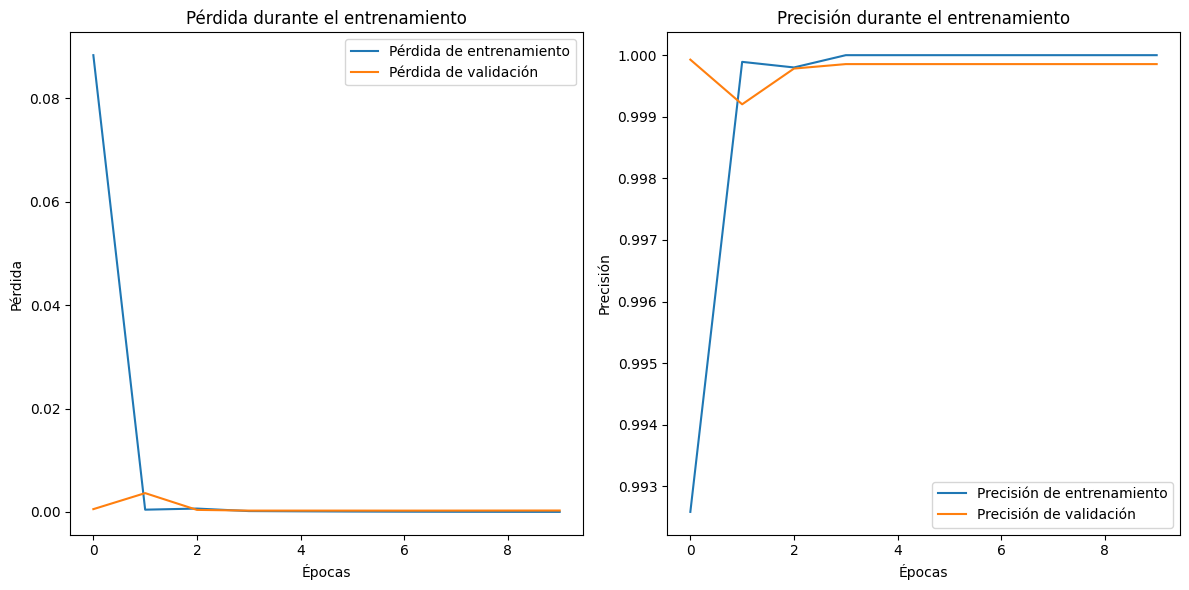

In [66]:
# Predecir las etiquetas en el conjunto de prueba
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Mostrar métricas de rendimiento
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

#### Métricas LSTM (1° balanceo)

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Accuracy Score: 0.9970391490294989

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15878
           1       1.00      1.00      1.00       897
           2       0.82      0.89      0.85        56
           3       0.00      0.00      0.00        11
           4       1.00      0.99      1.00      1270
           5       0.97      0.92      0.95       114
           6       0.64      0.58      0.61        12

    accuracy                           1.00     18238
   macro avg       0.77      0.77      0.77     18238
weighted avg       1.00      1.00      1.00     18238



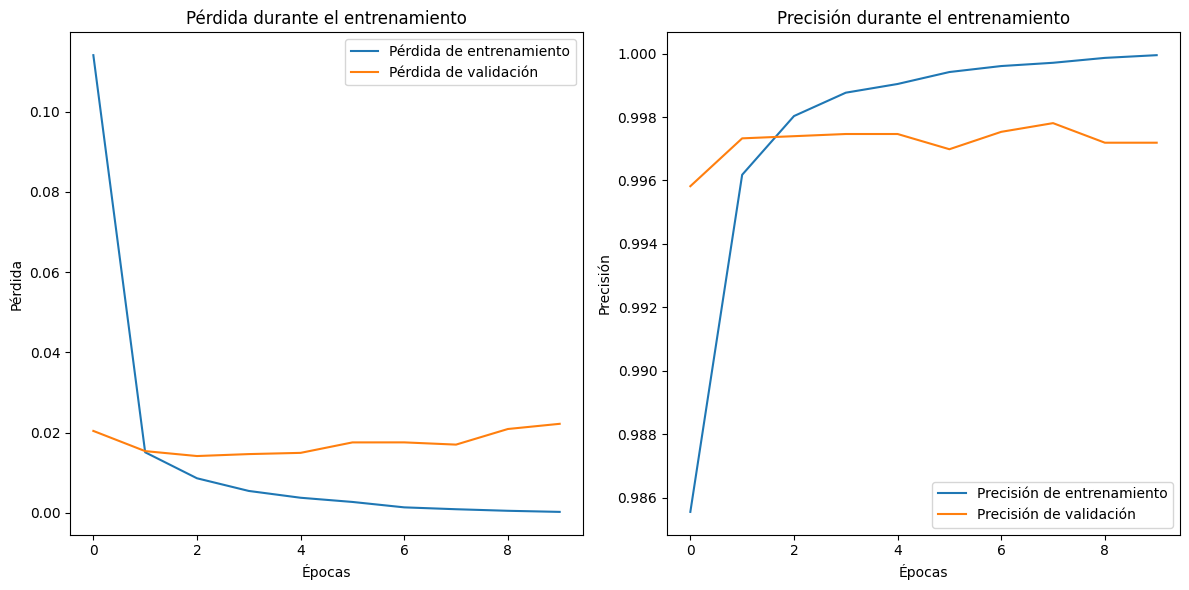

In [68]:
# Predecir las etiquetas en el conjunto de prueba
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Mostrar métricas de rendimiento
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

#### Métricas LSTM (2° balanceo)

602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

Accuracy Score (Test): 0.9972450358665141

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16702
           1       1.00      0.99      0.99       986
           2       0.96      0.89      0.92       109
           3       0.90      0.86      0.88       101
           4       1.00      1.00      1.00      1239
           5       1.00      0.99      0.99        97
           6       0.67      0.50      0.57         4

    accuracy                           1.00     19238
   macro avg       0.93      0.89      0.91     19238
weighted avg       1.00      1.00      1.00     19238


Accuracy Score (Train): 0.9990383365821962

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66790
           1       1.00      1.00      1.00      3883
    

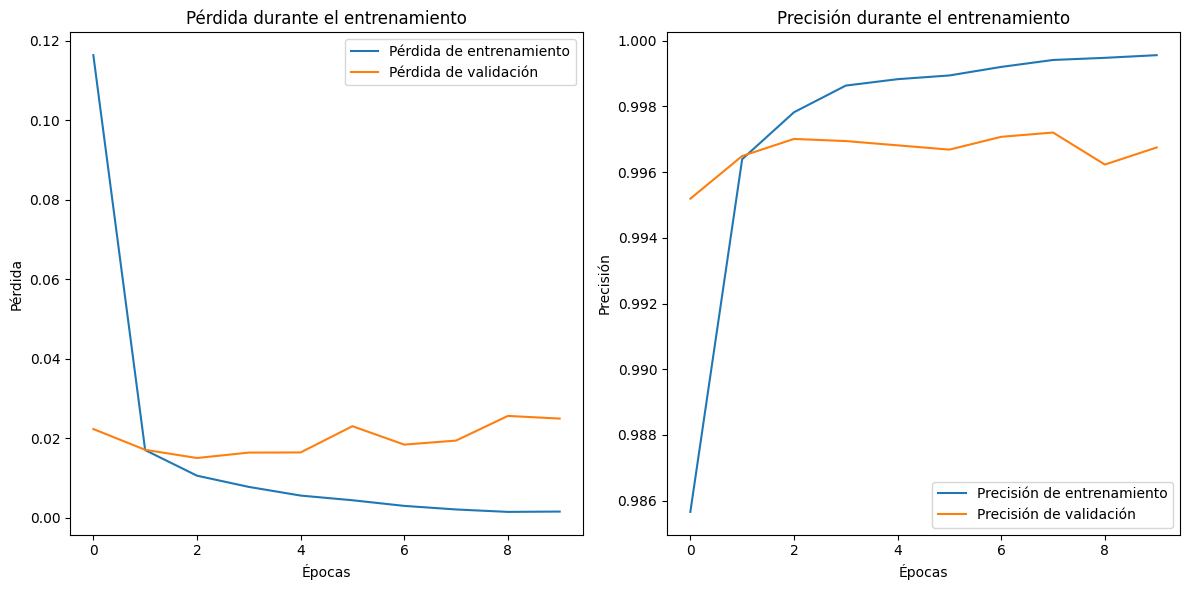

In [70]:
# Predecir las etiquetas en el conjunto de prueba
y_pred_test = np.argmax(model.predict(X_test_reshaped), axis=1)

# Predecir las etiquetas en el conjunto de entrenamiento
y_pred_train = np.argmax(model.predict(X_train_reshaped), axis=1)

# Mostrar métricas de rendimiento para el conjunto de prueba
print("\nAccuracy Score (Test):", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))

# Mostrar métricas de rendimiento para el conjunto de entrenamiento
print("\nAccuracy Score (Train):", accuracy_score(y_train, y_pred_train))
print("\nClassification Report (Train):\n", classification_report(y_train, y_pred_train))

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Fase 6: Deployment

### Predicción de prueba

Se realiza una predicción para probar el rendimiento del modelo LSTM y poder mostrando los resultados de la acción mínima eficiente para los grupos de deudores.

In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_deudores = df_final.copy()  # Crear una copia del DataFrame original
X_deudores = df_deudores.drop(columns=['etiqueta_accion', 'fecha', 'Descripcion', 'fecha_pago', 'id_cliente'])

# Normalizar las características de deudores usando el mismo scaler
X_deudores_scaled = scaler.transform(X_deudores)

# Reshape para predicciones
X_deudores_reshaped = X_deudores_scaled.reshape((-1, 1, X_deudores_scaled.shape[1]))

# Realizar predicciones con el modelo LSTM entrenado
y_deudores_pred = np.argmax(model.predict(X_deudores_reshaped), axis=1)

# Agregar las predicciones al DataFrame original
df_deudores['accion_predicha'] = y_deudores_pred

# Agrupar deudores por acción predicha, separando los IDs por comas y contando el número de deudores
df_group = df_deudores.groupby('accion_predicha').agg(
  deudores=('deudor', lambda x: ','.join(x.astype(str))),  # Concatenar IDs de deudores
  total_deudores=('deudor', 'count')  # Contar el total de deudores por acción
).reset_index()

# Mostrar el DataFrame agrupado
df_group.head(8)


2694/2694 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


,accion_predicha,deudores,total_deudores
0,0,"8620334,12615620,12865394,12957074,13061276,13...",75066
1,1,"15540356,17553794,19680218,20896556,21116144,2...",4358
2,2,114389234,1
3,3,"116900732,156235700",2
4,4,"14269610,17730122,18514970,18707948,18947930,1...",6239
5,5,"592580,22044824,23429852,24624212,26569886,266...",518
6,6,"40851128,60895808,77740400,90643586",4


### Exportación de modelos

Se exportan los modelos para poder utilizarlos en producción

In [74]:
import joblib

# Exportar el modelo K-Means
joblib.dump(kmeans7, 'kmeans_model.pkl')

print("Modelo K-Means guardado como 'kmeans_model.pkl'")

Modelo K-Means guardado como 'kmeans_model.pkl'


In [75]:
# Guardar el modelo LSTM
model.save('lstm_model.keras')

# Cargar el modelo para producción
from tensorflow.keras.models import load_model
model = load_model('lstm_model.keras')
print("Modelo LSTM guardado como lstm_model.keras")

Modelo LSTM guardado como lstm_model.keras
